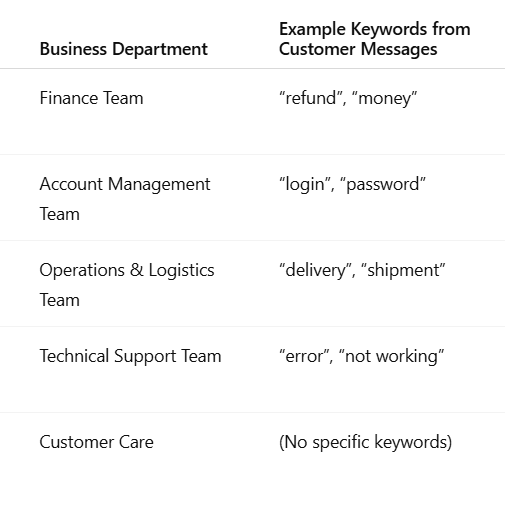

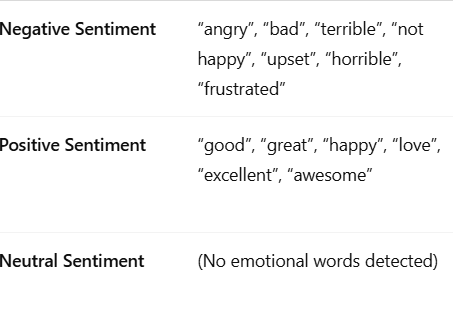

In [3]:
!pip install ollama 

In [4]:
import ollama 
import pandas

In [18]:
def classify_issue(message: str) -> str:
    """
    Classify a support message into one of the categories.
    """
    message = message.lower()
    if "refund" in message or "money" in message:
        return "Billing/Refund Issue"
    elif "login" in message or "password" in message:
        return "Account/Authentication Issue"
    elif "delivery" in message or "shipment" in message:
        return "Delivery/Logistics Issue"
    elif "error" in message or "not working" in message:
        return "Technical Issue"
    else:
        return "General Inquiry"

In [19]:
def analyze_sentiment(message: str) -> str:
    """
    Simple rule-based sentiment analysis (for demo).
    """
    negative_words = ["angry", "bad", "terrible", "not happy", "upset", "horrible", "frustrated"]
    positive_words = ["good", "great", "happy", "love", "excellent", "awesome"]
    text = message.lower()

    if any(w in text for w in negative_words):
        return "Negative"
    elif any(w in text for w in positive_words):
        return "Positive"
    else:
        return "Neutral"

In [20]:
# description

#list - 

tools= [{"type":"function",
        "function":{
            "name":"classify_issue",
            "description":"Classify the support messages  into issue category",
            "parameters":{
                "type":"object",
                "properties":{
                    "message":{"type":"string", "description":"Customer text message"},
                },
                "required":["messages"],
            },
        },
        },

        {"type":"function",
        "function":{
            "name":"analyze_sentiment",
            "description":"Analyze the sentiment of the customer message{positive, neutral  , negative}.",
            "parameters":{
                "type":"object",
                "properties":{
                    "message":{"type":"string", "description":"Customer text message"},
                },
                "required":["messages"],
            },
        },
        }]

In [21]:
tools

[{'type': 'function',
  'function': {'name': 'classify_issue',
   'description': 'Classify the support messages  into issue category',
   'parameters': {'type': 'object',
    'properties': {'message': {'type': 'string',
      'description': 'Customer text message'}},
    'required': ['messages']}}},
 {'type': 'function',
  'function': {'name': 'analyze_sentiment',
   'description': 'Analyze the sentiment of the customer message{positive, neutral  , negative}.',
   'parameters': {'type': 'object',
    'properties': {'message': {'type': 'string',
      'description': 'Customer text message'}},
    'required': ['messages']}}}]

In [22]:
customer_message = (
    "I’m really upset! I placed an order a week ago and it still hasn’t arrived. "
    "Your tracking link doesn’t work and no one is replying to my emails!"
)

In [23]:
initial_message= [
    {"role":"user","content":f"Analyse and classify the  customer message :{customer_message}"}]


initial_response= ollama.chat(
    model= "qwen3:8b",
    messages=initial_message,
    tools=tools,)

In [24]:
print(initial_response["message"])

role='assistant' content='' thinking='Okay, let\'s see. The user wants me to analyze and classify their customer message. The message is: "I’m really upset! I placed an order a week ago and it still hasn’t arrived. Your tracking link doesn’t work and no one is replying to my emails!"\n\nFirst, I need to figure out which functions to use. The available tools are classify_issue and analyze_sentiment. The user mentioned both analyzing sentiment and classifying the issue, so I should use both functions.\n\nStarting with analyze_sentiment. The message has words like "upset" and "no one is replying," which indicate negative emotions. The sentiment here is likely negative. So I\'ll call analyze_sentiment with the message.\n\nNext, classify_issue. The main issues here are the order not arriving, the tracking link not working, and no response to emails. These seem to relate to order tracking problems and customer service responsiveness. The category might be something like "Order Delivery" or "

In [25]:
message_for_next_step = initial_message+[initial_response["message"]]

In [26]:
tool_outputs=[]

In [43]:
print(initial_response["message"]["tool_calls"][0]["function"]["arguments"]["messages"][0])

I’m really upset! I placed an order a week ago and it still hasn’t arrived. Your tracking link doesn’t work and no one is replying to my emails!


In [38]:
# 2. Execute the tool calls identified by the model
if "tool_calls" in initial_response["message"]:
    for tool_call in initial_response["message"]["tool_calls"]:
        name = tool_call["function"]["name"]
        args = tool_call["function"]["arguments"]
        
        # Execute the correct function
        if name == "classify_issue":
            result = classify_issue(args["messages"][0])
        elif name == "analyze_sentiment":
            result = analyze_sentiment(args["messages"][0])
        else:
            result = f"Unknown tool call: {name}"
            
        # Prepare the tool output message
        tool_outputs.append(
            {
                "role": "tool",
                "name": name,
                "content": result,
            }
        )

In [39]:
tool_outputs

[{'role': 'tool', 'name': 'analyze_sentiment', 'content': 'Negative'},
 {'role': 'tool', 'name': 'classify_issue', 'content': 'General Inquiry'}]

In [49]:
if tool_outputs:
    message_for_next_step.extend(tool_outputs)
    
    final_response= ollama.chat(
        model="qwen3:8b",
        messages=message_for_next_step,)
    
    import re
    response_text= final_response['message']['content']
    actual_response= re.sub(r"<think>.*?</think>","",response_text,flags=re.DOTALL).strip()
    print(actual_response)

It seems you're confirming the analysis! Here's a summary of the findings:

1. **Sentiment**: The customer is clearly frustrated and upset.  
2. **Issue Classification**: The problem falls under **General Inquiry** (likely related to order tracking and customer service responsiveness).  

If you need further assistance or want to escalate this, feel free to ask! 😊
